# STOR 120 Final Exam (100 pts)

Due: Thursday, December 14th, at 11:00am

Directions: The final exam is open book, notes, course materials, and internet, BUT if you are found to be submitting the work of other students as your exam submission, an honor code violation will be reported. This could be by communication with others and the sharing of answers and code during the exam time, by using the solutions to exams from previous semesters, or online answer tools such as Chegg, CourseHero, ChatGPT, etc. This is a zero tolerance policy and all suspected honor code violations will be reported. Just as with all course assignments, you should submit this exam to Gradescope as a Jupyter Notebook with the ipynb file extension. To receive full credit, you should show and run all of your code used to answer each question. You can and SHOULD use or adapt functions that we have written in class or from the textbook.

**Check your file on Gradescope to ensure that it is the file that you intended to submit!**

This (old) dataset contains data on 159 automobiles. For each automobile there are values for various features represented as numerical values as well the automobile's price.

In [4]:
# Run this cell to set up your notebook

from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

from scipy import stats
from scipy.stats import norm
from scipy.stats import t

Autos = Table.read_table('Autos.csv').drop('symboling', 'normalized-losses')
Autos.show(3)

wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
99.8,176.6,66.2,54.3,2337,109,3.19,3.4,10,102,5500,24,30,13950
99.4,176.6,66.4,54.3,2824,136,3.19,3.4,8,115,5500,18,22,17450
105.8,192.7,71.4,55.7,2844,136,3.19,3.4,8.5,110,5500,19,25,17710


## 1. Exploratory Data Analysis (36 pts)

Run the code below to add a new column to the `Autos` table named `Class` which is the value 1 if the automobile's price is greater than 10,000 dollars and 0 otherwise.

In [5]:
Autos = Autos.with_column('Class', 1*(Autos.column('price') > 10000))
Autos.show(3)

wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,Class
99.8,176.6,66.2,54.3,2337,109,3.19,3.4,10,102,5500,24,30,13950,1
99.4,176.6,66.4,54.3,2824,136,3.19,3.4,8,115,5500,18,22,17450,1
105.8,192.7,71.4,55.7,2844,136,3.19,3.4,8.5,110,5500,19,25,17710,1


**Question 1.1.** Construct a new table named `means_by_price_class` with two rows. The table should report separately for automobiles in `Class` 1 and in `Class` 0, the mean values for all of the features reported in the `Autos` table. *(4 pts)*

In [6]:
means_by_price_class = Autos.group("Class", np.mean)
means_by_price_class

Class,wheel-base mean,length mean,width mean,height mean,curb-weight mean,engine-size mean,bore mean,stroke mean,compression-ratio mean,horsepower mean,peak-rpm mean,city-mpg mean,highway-mpg mean,price mean
0,95.3979,165.345,64.4415,53.3628,2148.15,101.894,3.175,3.22543,9.89053,77.6383,5159.04,29.9149,35.7447,7658.99
1,102.409,182.637,67.2938,54.6754,2913.77,144.292,3.48108,3.25215,10.5525,122.154,5048.46,21.6154,26.7846,16921.9


**Question 1.2.** Construct a table named `Autos_small_SU`. This table should contain the columns `horsepower`, `highway-mpg`, and `stroke` all in standard units as well as `Class` but not in standard units. *(6 pts)*

In [7]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)  

Autos_small_SU = Table().with_columns(
    'horsepower', standard_units(Autos.column('horsepower')),
    'highway-mpg', standard_units(Autos.column('highway-mpg')),
    'stroke', standard_units(Autos.column('stroke')),
    'Class', Autos.column('Class'))
Autos_small_SU

horsepower,highway-mpg,stroke,Class
0.201279,-0.323313,0.556703,1
0.625812,-1.56577,0.556703,1
0.46253,-1.09985,0.556703,1
1.44222,-1.87639,0.556703,1
0.168622,-0.47862,-1.4844,1
0.168622,-0.47862,-1.4844,1
0.821751,-0.633928,-0.157683,1
0.821751,-0.633928,-0.157683,1
-1.56217,3.24876,-0.701976,0
-0.843727,1.69568,-0.429829,0


**Question 1.3.** What proportion of the automobiles in the data set are in `Class` 0? Assign this value to `Class0_proportion`. *(4 pts)*

In [8]:
Class0_proportion = Autos.where('Class', 0).num_rows / Autos.num_rows
Class0_proportion

0.5911949685534591

**Question 1.4.** Now consider the automobiles with `horsepower` values that are below the mean. What proportion of these automobiles are in `Class` 0? Assign this float value to `low_horsepower_Class0_proportion`. Also find the proportion of automobiles that are `Class` 0 within the subset of automobiles with `highway-mpg` values that are at least half of a standard deviation below the mean. Assign that float value to `low_mpg_Class0_proportion`. *(10 pts)*

In [9]:
low_horsepower_Class0_proportion = Autos.where('horsepower', are.below(np.mean(Autos.column('horsepower')))).where('Class', 0).num_rows / Autos.where('horsepower', are.below(np.mean(Autos.column('horsepower')))).num_rows
low_horsepower_Class0_proportion

0.8695652173913043

In [10]:
low_mpg = Autos.where('highway-mpg', are.below(np.mean(Autos.column('highway-mpg')) - .5 * np.std(Autos.column('highway-mpg'))))
low_mpg_Class0_proportion = low_mpg.where('Class', 0).num_rows / low_mpg.num_rows
low_mpg_Class0_proportion

0.02127659574468085

**Question 1.5.** Interpret your answers to Questions 1.3 and 1.4. What do they suggest regarding the relationship between the price of an automobile and its horsepower and highway mileage? *(4 pts)*

*The majority of the horsepower values are below the mean, meaning there are a few outliers with high values pulling up the mean. The highway mpg values are more on the higher end because with only 20% of the values under half a std below the mean, there isn't room for 60% to be centered around the mean, and some values must be higher. Horsepower and highway mpg are likely inversely related.*

**Question 1.6.** Construct a scatter plot with horsepower on the horizontal axis and price on the vertical axis. Include the best fit line in this plot. *(4 pts)*

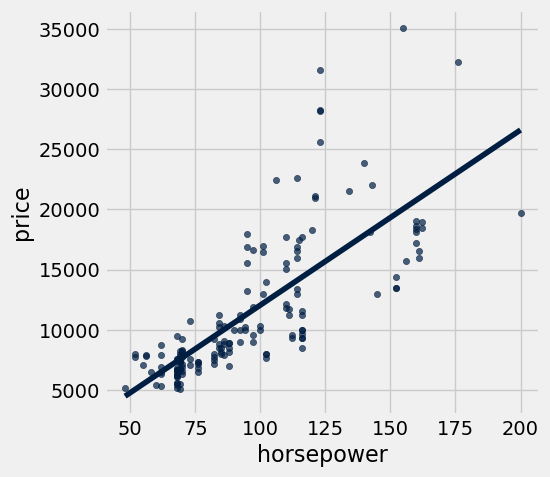

In [11]:
Autos.scatter('horsepower', 'price', fit_line = True)

**Question 1.7.** Calculate the correlation coefficient between horsepower and price. Assign this value to `hp_price_corr`. *(4 pts)*

In [12]:
def correlation(t, x, y):
    return np.mean(standard_units(t.column(x))*standard_units(t.column(y)))

hp_price_corr = correlation(Autos, 'horsepower', 'price')
hp_price_corr

0.75987394538009989

## 2. Testing: Peak RPM and Price (28 pts)

**Question 2.1.** Find the difference between the mean `peak_rpm` for automobiles in `Class` 0 and the mean `peak-rpm` for automobiles in `Class` 1. Assign `observed_diff` to this difference. *(4 pts)*

In [13]:
prpm_mean = means_by_price_class.column('peak-rpm mean')
observed_diff = prpm_mean.item(1) - prpm_mean.item(0)
observed_diff

-110.58101472995168

**Question 2.2.** Using the A/B testing simulation methods from class, perform a hypothesis test at the 1% significance level to investigate whether the mean `peak_rpm` values for automobiles costing more than 10k dollars is less than the mean `peak_rpm` for automobiles costing 10k dollars or less. State your hypotheses first. Then perform the test, including supporting plots, and describe your conclusions using simple non-technical language. When performing the test, repeat your simulation **2000** times! Assign the p-value of your hypothesis test to `p_value`. *(10 pts)*

*The null hypothesis: The difference in mean `peak-rpm` values for costing more than 10k dollars and costing 10k dollars or less is 0.
The alternative hypothesis: The difference in mean `peak-rpm` values for costing more than 10k dollars and costing 10k dollars or less is less than 0.*

0.92149999999999999

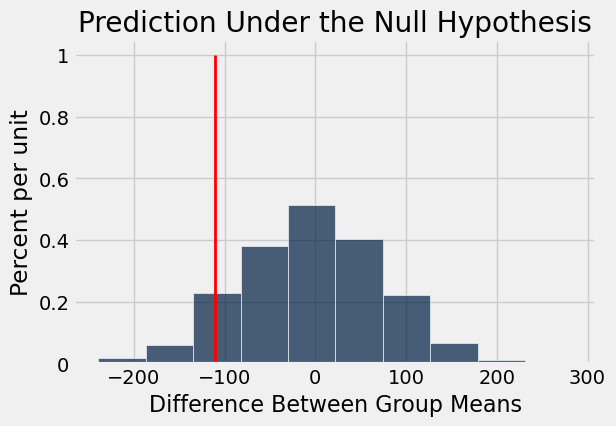

In [14]:
def difference_of_means(table, label, group_label):
    reduced = table.select(label, group_label)  
    means_table = reduced.group(group_label, np.average)
    means = means_table.column(1)
    
    return means.item(1) - means.item(0)

def one_simulated_difference(table, label, group_label):
    shuffled_labels = table.sample(with_replacement = False).column(group_label)
    shuffled_table = table.select(label).with_column(
        'Shuffled Label', shuffled_labels)
    
    return difference_of_means(shuffled_table, label, 'Shuffled Label')   

differences = make_array()

for i in np.arange(2000):
    new_difference = one_simulated_difference(Autos, 'peak-rpm', 'Class')
    differences = np.append(differences, new_difference)

Table().with_column('Difference Between Group Means', differences).hist()
plots.title('Prediction Under the Null Hypothesis');
plots.plot([observed_diff, observed_diff], [0, .01], color='red', lw=2);

p_value = sum(differences > observed_diff)/2000
p_value

*The p-value is greater than 0.01, so we fail to reject the null. There is no evidence to support the difference in mean `peak-rpm` values for costing more than 10k dollars and costing 10k dollars or less is less than 0.  

**Question 2.3.** Recalculate the p-value from the previous question, but rather than using simulation methods, perform the calculation with the Normal or t-distribution (whichever is most appropriate for this situtation). You should do this with the methods performed in class. Assign this value to `p_value2`. *(8 pts)*

In [15]:
sd_c1 = np.std(Autos.where('Class', 1).column('peak-rpm'))
sd_c0 = np.std(Autos.where('Class', 0).column('peak-rpm'))

n_c1 = Autos.where('Class', 1).num_rows
n_c0 = Autos.where('Class', 0).num_rows

sd_diff = np.sqrt(sd_c1**2 / n_c1 + sd_c0**2 / n_c0)
t_score = observed_diff / sd_diff

p_value2 = 1 - t.cdf(t_score, min(n_c1, n_c0)-1)
p_value2

0.92917847367374085

**Question 2.4.** For the methods used to calculate the p-value in the previous question (2.3), what is the smallest magnitude of the `observed_diff` that would lead you to reject the null hypothesis at the 1% significance level? Assign this value to `min_reject_observed_diff`. *(6 pts)*

In [18]:
def p_val(observed_diff):
     return 1 - t.cdf(t_score, min(n_c1, n_c0)-1)

min_reject_observed_diff = minimize(p_val)
min_reject_observed_diff

2.587928961545842

## 3. Prediction: Horsepower vs. Price (18 pts)

**Question 3.1** In questions 1.6 & 1.7 you analyzed the relationship between horsepower and price. Determine the slope and the intercept for the linear regression model using `horsepower` as the predictor and `price` as the response. Assign the value of the slope of this model to `price_slope` and the intercept of this model to `price_intercept`. *(6 pts)*

In [42]:
def slope(t, label_x, label_y):
    r = correlation(t, label_x, label_y)
    return r*np.std(t.column(label_y))/np.std(t.column(label_x))

def intercept(t, label_x, label_y):
    return np.mean(t.column(label_y)) - slope(t, label_x, label_y)*np.mean(t.column(label_x))

price_slope = slope(Autos, 'horsepower', 'price')
price_intercept = intercept(Autos, 'horsepower', 'price')

# Do not change the below code
120 * price_slope + price_intercept

14959.064648277945

**Question 3.2** Use the linear regression model from the previous question and simulation methods from class to construct a **70%** confidence interval for the mean price for automobiles with a horsepower of 120. Perform your simulation only **2000** times! Assign the upper and lower bounds of your confidence interval to `lower_bound` and `upper_bound`. *(12 pts)*

In [48]:
def prediction_at(t, x, y, x_value):
    return slope(t, x, y) * x_value + intercept(t, x, y)

price_pred = make_array()

for i in np.arange(2000):
    bootstrap = Autos.sample()
    pred_mean = prediction_at(Autos, 'horsepower', 'price', 120)
    price_pred = np.append(price_pred, pred_mean)

lower_bound = percentile(15, price_pred)
upper_bound = percentile(85, price_pred)

# do not change the below code
lower_bound, upper_bound

(14959.064648277945, 14959.064648277945)

## 4. Classification (18 pts)

**Question 4.1** Construct two new tables (`Autos_train` and `Autos_test`). Use the `sample()` function to randomly assign roughly 75% of the data in `Autos_small_SU` to the training set and the remaining 25% of the data to the testing set. *(6 pts)*

In [49]:
np.random.seed(12142023) #Do not change

train_size = int(np.round(Autos_small_SU.num_rows * 0.75))

shuffled_Autos_SU = Autos_small_SU.sample(with_replacement=False) 
Autos_train = shuffled_Autos_SU.take(np.arange(train_size))
Autos_test  = shuffled_Autos_SU.take(np.arange(train_size, Autos_small_SU.num_rows))

**Question 4.2** Use the training data set to classify the automobiles in your testing data set as either 1 (predicted price class to be 1) or 0 (predicted price class to be 0). To answer this question, you should implement a k-Nearest Neighbors algorithm (with k=7) with methods used during class. Then evaluate the accuracy of this classification model and assign `price_class_accuracy` to the proportion of your testing data that was correctly classified. *(4 pts)*

In [51]:
def distance(pt1, pt2):
    """Return the distance between two points, represented as arrays"""
    return np.sqrt(sum((pt1 - pt2)**2))

def row_distance(row1, row2):
    """Return the distance between two numerical rows of a table"""
    return distance(np.array(row1), np.array(row2))

def distances(training, example):
    """
    Compute distance between example and every row in training.
    Return training augmented with Distance column
    """
    distances = make_array()
    attributes_only = training.drop('Class')
    
    for i in np.arange(attributes_only.num_rows):
        row = attributes_only.row(i)
        distances = np.append(distances, row_distance(row, example))
        
    return training.with_column('Distance_to_ex', distances)

def closest(training, example, k):
    """
    Return a table of the k closest neighbors to example
    """
    return distances(training, example).sort('Distance_to_ex').take(np.arange(k))

def majority_class(topk):
    """
    Return the class with the highest count
    """
    return topk.group('Class').sort('count', descending=True).column(0).item(0)

def classify(training, example, k):
    """
    Return the majority class among the 
    k nearest neighbors of example
    """
    return majority_class(closest(training, example, k))

def evaluate_accuracy(training, test, k):
    """Return the proportion of correctly classified examples 
    in the test set"""
    test_attributes = test.drop('Class')
    num_correct = 0
    for i in np.arange(test.num_rows):
        c = classify(training, test_attributes.row(i), k)
        num_correct = num_correct + (c == test.column('Class').item(i))
    return num_correct / test.num_rows

In [53]:
price_class_accuracy = evaluate_accuracy(Autos_train, Autos_test, 7)
price_class_accuracy

0.875

**Question 4.3** Construct a confusion matrix for this classification. Assign `confusion_matrix` to a table with two rows and two columns. The values in the first row should represent the percentage of `Class` 1 automobiles in the testing data that are classified correctly, then incorrectly (respectively). The values in the second row should represent the percentage of `Class` 0 automobiles in the testing data that are classified *incorrectly* then *correctly* (respectively). Name the columns `Class 1 Predictions` and `Class 0 Predictions` respectively and round all values to the nearest percentage. *(8 pts)*

In [56]:
def evaluate_accuracy_by_class(training, test, k):
    """Return the proportion of correctly classified examples in the test set for each class"""
    
    test_attributes = test.drop('Class')
    
    num_c0_correct = 0
    num_c1_correct = 0
    
    for i in np.arange(test.num_rows):
        c = classify(training, test_attributes.row(i), k)
        if test.column('Class').item(i) == 0:
            num_c0_correct = num_c0_correct + (c == test.column('Class').item(i))
        if test.column('Class').item(i) == 1:
            num_c1_correct = num_c1_correct + (c == test.column('Class').item(i))
    
    prop_c0_correct = num_c0_correct / test.where('Class', 0).num_rows
    prop_c1_correct = num_c1_correct / test.where('Class', 1).num_rows
    
    return Table().with_columns(
        'Class 1 Predictions', make_array(prop_c1_correct, 1 - prop_c1_correct), 
        'Class 0 Predictions', make_array(1 - prop_c0_correct, prop_c0_correct)
    )

confusion_matrix = evaluate_accuracy_by_class(Autos_train, Autos_test, 7)
confusion_matrix

Class 1 Predictions,Class 0 Predictions
0.833333,0.0909091
0.166667,0.909091
